<a href="https://colab.research.google.com/github/chamikasudusinghe/nocml/blob/master/fft_r3_i1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Module Imports for Data Fetiching and Visualization



In [1]:
import time
import pandas as pd
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


Module Imports for Data Processing

In [0]:
from sklearn import preprocessing
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
import pickle

Importing Dataset from GitHub

Train Data

In [0]:
df1 = pd.read_csv('https://raw.githubusercontent.com/chamikasudusinghe/nocml/master/dos%20results%20ver%204/router-dataset/r3/2-fft-malicious-n-0-15-m-1-r3.csv?token=AKVFSOHBOJDR6J3GWCSIHIS63IDNE')
df9 = pd.read_csv('https://raw.githubusercontent.com/chamikasudusinghe/nocml/master/dos%20results%20ver%204/router-dataset/r3/2-fft-normal-n-0-15-r3.csv?token=AKVFSOHXRRZMQOHJNEFRN2K63IDUE')


In [0]:
df = df1.append(df9, ignore_index=True,sort=False)
df = df.sort_values('timestamp')
df.to_csv('fft-r1-train.csv',index=False)

In [5]:
df = pd.read_csv('fft-r1-train.csv')
df

,timestamp,outport,inport,cache_coherence_type,flit_id,flit_type,vnet,vc,src_ni,src_router,dst_ni,dst_router,traversal_id,hop_count,current_hop,hop_percentage,enqueue_time,packet_count_decr,packet_count_incr,max_packet_count,packet_count_index,port_index,traversal_index,cache_coherence_vnet_index,vnet_vc_cc_index,target
0,15,1,4,1,1,4,3,9,1,1,23,7,2,3,2,0.666667,12,8,1,8,8,4,8,3,27,0
1,19,1,4,1,1,4,3,9,0,0,23,7,1,4,3,0.750000,16,4,1,4,4,4,4,3,27,1
2,19,1,4,1,1,4,3,10,0,0,23,7,1,4,3,0.750000,16,7,2,8,14,4,4,3,30,0
3,346,1,4,1,1,4,3,9,1,1,23,7,11,3,2,0.666667,12,6,3,8,18,4,44,3,27,0
4,354,1,4,1,1,4,3,9,0,0,23,7,8,4,3,0.750000,16,3,2,4,6,4,32,3,27,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
53807,3274969,0,1,3,1,4,3,9,20,4,19,3,30074,4,4,1.000000,21,1,15,15,15,0,360888,9,81,0
53808,3275116,1,4,7,1,4,3,9,17,1,15,15,20055,5,2,0.400000,14,2,1,2,2,4,561540,21,189,1
53809,3275323,1,4,7,1,4,3,9,18,2,15,15,20057,4,1,0.250000,9,1,2,2,2,4,561596,21,189,1
53810,3276342,1,4,7,1,4,3,9,17,1,15,15,30089,5,2,0.400000,14,2,1,2,2,4,842492,21,189,0


In [6]:
df.shape

(53812, 26)

Test Data

In [0]:
df13 = pd.read_csv('https://raw.githubusercontent.com/chamikasudusinghe/nocml/master/dos%20results%20ver%204/router-dataset/r3/2-fft-malicious-n-0-15-m-11-r3.csv?token=AKVFSOBVUGL7OSHKLIU3Z3S63IDNK')
df14 = pd.read_csv('https://raw.githubusercontent.com/chamikasudusinghe/nocml/master/dos%20results%20ver%204/router-dataset/r3/2-fft-malicious-n-0-15-m-12-r3.csv?token=AKVFSOE4XEDCYO4VR63SV2C63IE7C')
df15 = pd.read_csv('https://raw.githubusercontent.com/chamikasudusinghe/nocml/master/dos%20results%20ver%204/router-dataset/r3/2-fft-malicious-n-0-15-m-7-r3.csv?token=AKVFSOCVVADXM4BZ62CH6JC63IE7I')

In [8]:
print(df13.shape)
print(df14.shape)
print(df15.shape)

(28688, 26)
(27630, 26)
(28688, 26)


Processing

In [9]:
df.isnull().sum()

timestamp                     0
outport                       0
inport                        0
cache_coherence_type          0
flit_id                       0
flit_type                     0
vnet                          0
vc                            0
src_ni                        0
src_router                    0
dst_ni                        0
dst_router                    0
traversal_id                  0
hop_count                     0
current_hop                   0
hop_percentage                0
enqueue_time                  0
packet_count_decr             0
packet_count_incr             0
max_packet_count              0
packet_count_index            0
port_index                    0
traversal_index               0
cache_coherence_vnet_index    0
vnet_vc_cc_index              0
target                        0
dtype: int64

In [0]:
df = df.drop(columns=['timestamp','src_ni','src_router','dst_ni','dst_router'])

In [11]:
df.corr()

,outport,inport,cache_coherence_type,flit_id,flit_type,vnet,vc,traversal_id,hop_count,current_hop,hop_percentage,enqueue_time,packet_count_decr,packet_count_incr,max_packet_count,packet_count_index,port_index,traversal_index,cache_coherence_vnet_index,vnet_vc_cc_index,target
outport,1.000000,-0.693834,0.309374,0.030198,-0.043165,NaN,0.619679,-0.034412,0.184530,-0.905299,-0.932550,-0.368872,-0.084948,0.180766,0.072265,0.076106,-0.265507,0.068071,0.309374,0.462930,0.005125
inport,-0.693834,1.000000,-0.200935,0.050687,-0.072452,NaN,-0.531368,0.110517,0.173049,0.675044,0.580382,0.355080,-0.002254,-0.221135,-0.168478,-0.143341,0.704704,0.019007,-0.200935,-0.347872,-0.069491
cache_coherence_type,0.309374,-0.200935,1.000000,0.321053,-0.458916,NaN,0.014351,-0.008148,0.010263,-0.380064,-0.372418,-0.563371,0.031554,-0.024433,0.005371,0.014314,-0.062504,0.285980,1.000000,0.955337,0.023521
flit_id,0.030198,0.050687,0.321053,1.000000,-0.152224,NaN,-0.100079,0.024795,-0.004142,-0.014000,0.019706,0.521122,0.019673,0.007807,0.020725,0.026265,0.012944,0.651693,0.321053,0.280170,-0.014683
flit_type,-0.043165,-0.072452,-0.458916,-0.152224,1.000000,NaN,0.143053,-0.035442,0.005921,0.020012,-0.028168,0.350931,-0.165590,0.127441,-0.028771,-0.022693,-0.018502,0.028529,-0.458916,-0.400477,0.020989
vnet,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
vc,0.619679,-0.531368,0.014351,-0.100079,0.143053,NaN,1.000000,-0.037774,-0.022693,-0.621664,-0.578895,-0.168290,-0.028463,0.167231,0.104658,0.095582,-0.327805,-0.039213,0.014351,0.299985,0.004954
traversal_id,-0.034412,0.110517,-0.008148,0.024795,-0.035442,NaN,-0.037774,1.000000,0.053879,0.033469,0.006773,0.045138,0.036792,0.037417,0.055967,0.025179,0.143907,0.558540,-0.008148,-0.019953,-0.286695
hop_count,0.184530,0.173049,0.010263,-0.004142,0.005921,NaN,-0.022693,0.053879,1.000000,0.078319,-0.342870,0.030617,-0.204392,-0.070949,-0.207659,-0.160419,0.631556,0.032836,0.010263,-0.002960,0.100789
current_hop,-0.905299,0.675044,-0.380064,-0.014000,0.020012,NaN,-0.621664,0.033469,0.078319,1.000000,0.897533,0.428495,0.025845,-0.181794,-0.117615,-0.112320,0.378827,-0.074188,-0.380064,-0.527518,0.061634


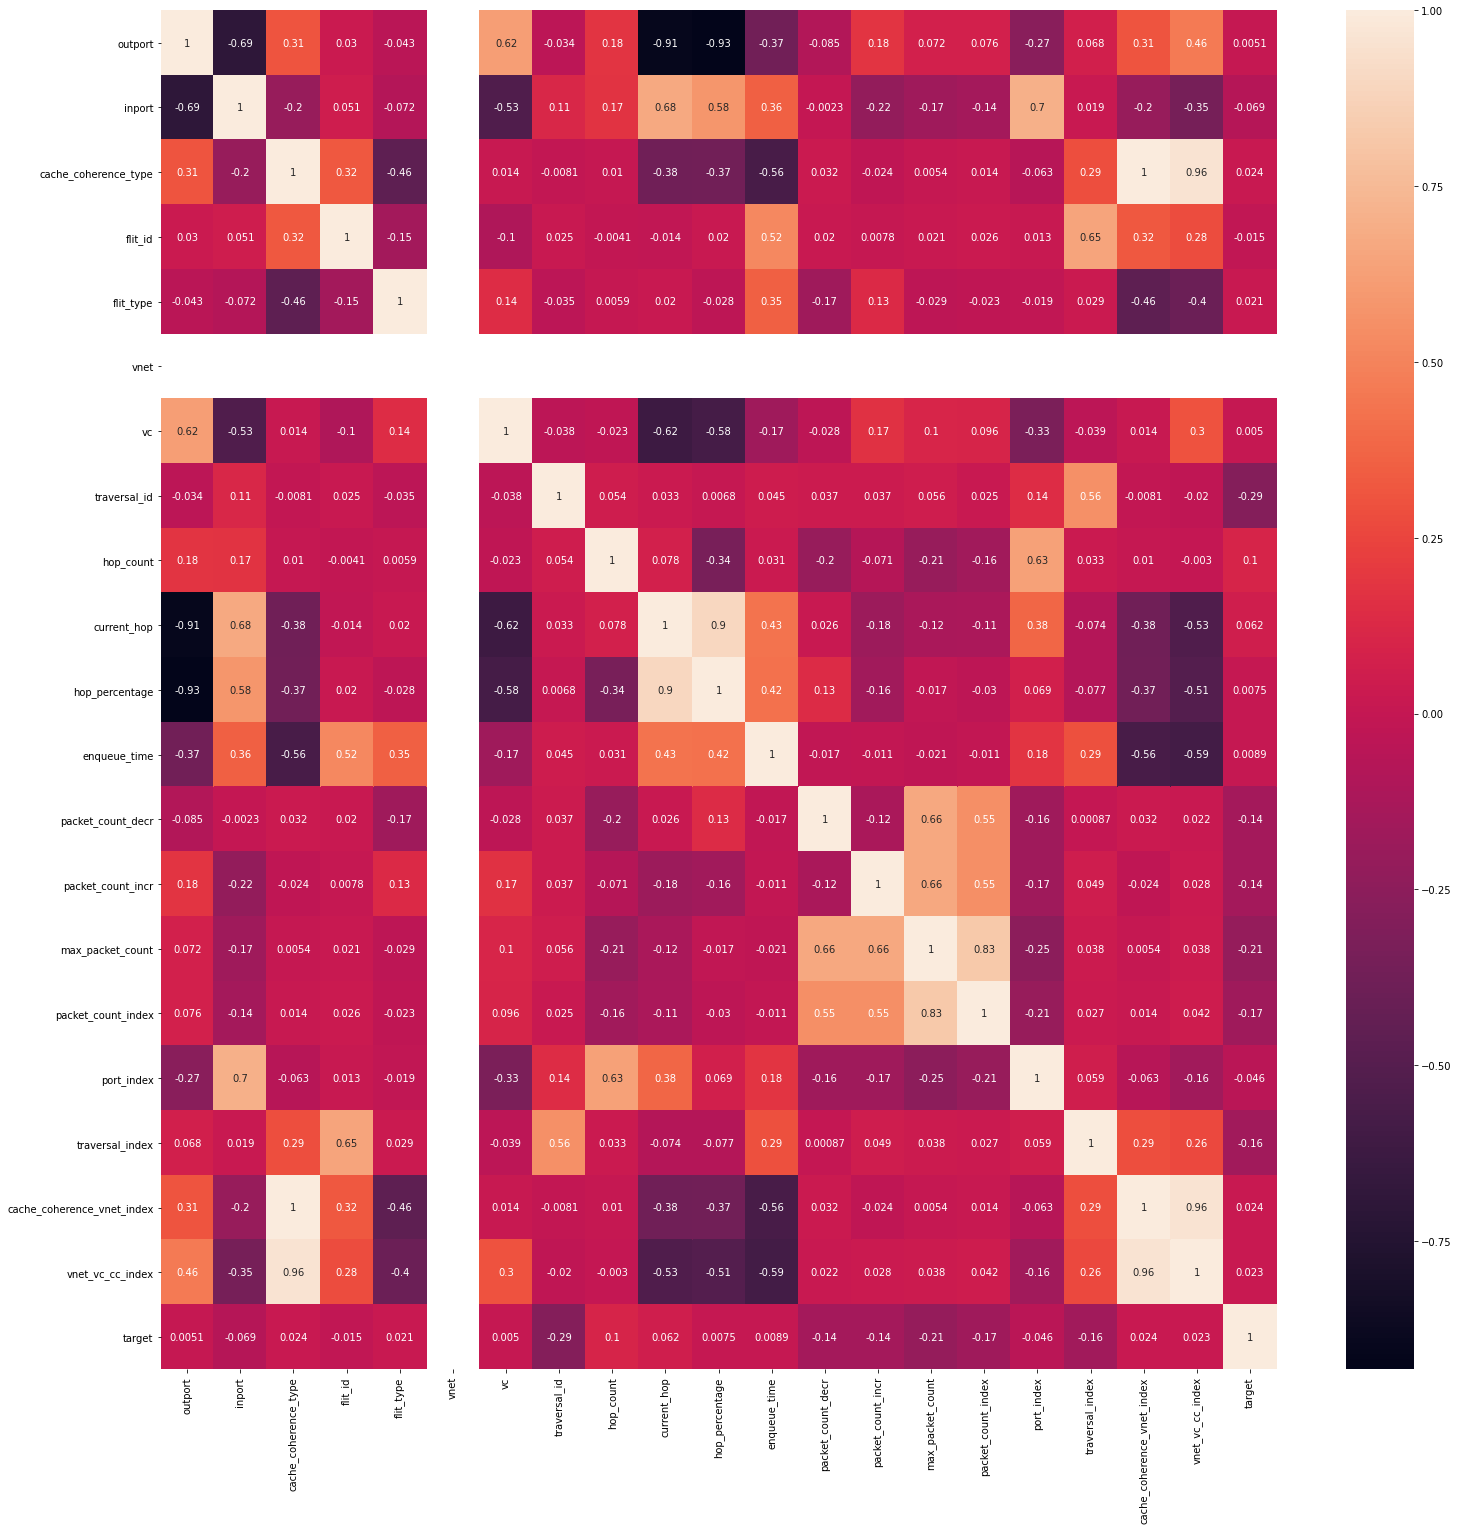

In [12]:
plt.figure(figsize=(25,25))
sns.heatmap(df.corr(), annot = True)
plt.show()

In [0]:
def find_correlation(data, threshold=0.9):
    corr_mat = data.corr()
    corr_mat.loc[:, :] = np.tril(corr_mat, k=-1)
    already_in = set()
    result = []
    for col in corr_mat:
        perfect_corr = corr_mat[col][abs(corr_mat[col])> threshold].index.tolist()
        if perfect_corr and col not in already_in:
            already_in.update(set(perfect_corr))
            perfect_corr.append(col)
            result.append(perfect_corr)
    select_nested = [f[1:] for f in result]
    select_flat = [i for j in select_nested for i in j]
    return select_flat

In [14]:
columns_to_drop = find_correlation(df.drop(columns=['target']))
columns_to_drop

['hop_percentage', 'outport', 'vnet_vc_cc_index', 'cache_coherence_type']

In [0]:
df = df.drop(columns=['inport','cache_coherence_type','flit_id','flit_type','vnet','current_hop','hop_percentage','port_index','cache_coherence_vnet_index','vnet_vc_cc_index'])

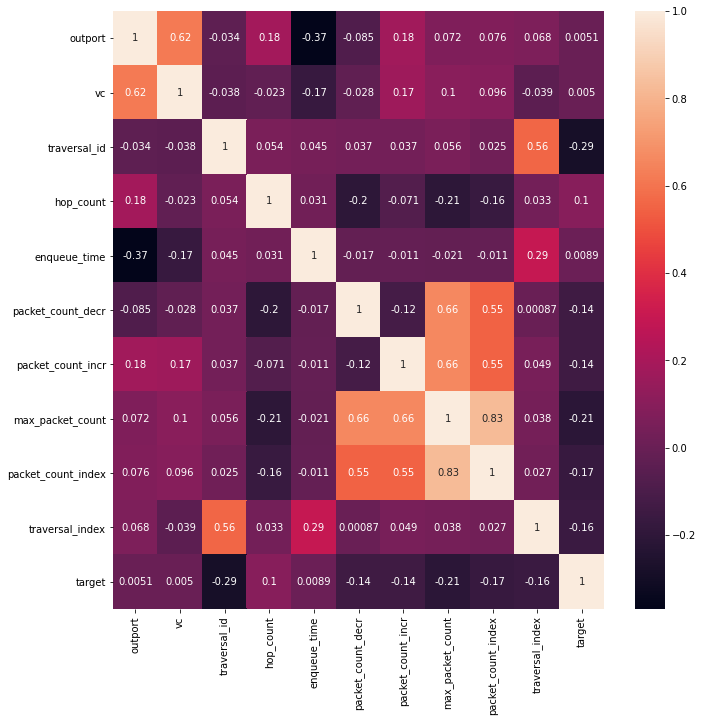

In [16]:
plt.figure(figsize=(11,11))
sns.heatmap(df.corr(), annot = True)
plt.show()

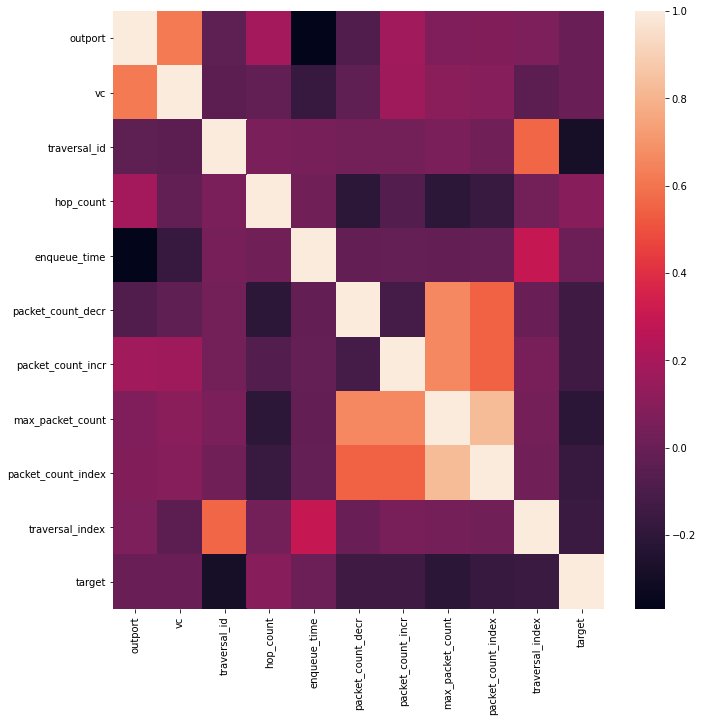

In [17]:
plt.figure(figsize=(11,11))
sns.heatmap(df.corr())
plt.show()

Processing Dataset for Training

In [0]:
train_X = df.drop(columns=['target'])
train_Y = df['target']

In [19]:
#standardization
x = train_X.values
min_max_scaler = preprocessing.MinMaxScaler()
columns = train_X.columns
x_scaled = min_max_scaler.fit_transform(x)
train_X = pd.DataFrame(x_scaled)
train_X.columns = columns
train_X

,outport,vc,traversal_id,hop_count,enqueue_time,packet_count_decr,packet_count_incr,max_packet_count,packet_count_index,traversal_index
0,0.25,0.000000,0.000033,0.25,0.142857,0.066667,0.000000,0.066667,0.002447,0.000001
1,0.25,0.000000,0.000000,0.50,0.214286,0.028571,0.000000,0.028571,0.001049,0.000000
2,0.25,0.333333,0.000000,0.50,0.214286,0.057143,0.009524,0.066667,0.004544,0.000000
3,0.25,0.000000,0.000332,0.25,0.142857,0.047619,0.019048,0.066667,0.005942,0.000015
4,0.25,0.000000,0.000233,0.50,0.214286,0.019048,0.009524,0.028571,0.001748,0.000010
...,...,...,...,...,...,...,...,...,...,...
53807,0.00,0.000000,0.999435,0.50,0.303571,0.000000,0.133333,0.133333,0.004893,0.133336
53808,0.25,0.000000,0.666467,0.75,0.178571,0.009524,0.000000,0.009524,0.000350,0.207472
53809,0.25,0.000000,0.666534,0.50,0.089286,0.000000,0.009524,0.009524,0.000350,0.207492
53810,0.25,0.000000,0.999934,0.75,0.178571,0.009524,0.000000,0.009524,0.000350,0.311276


In [20]:
train_X[train_X.duplicated()].shape

(11, 10)

In [21]:
test_X = df13.drop(columns=['target','timestamp','src_ni','src_router','dst_ni','dst_router','inport','cache_coherence_type','flit_id','flit_type','vnet','current_hop','hop_percentage','port_index','cache_coherence_vnet_index','vnet_vc_cc_index'])
test_Y = df13['target']
x = test_X.values
min_max_scaler = preprocessing.MinMaxScaler()
columns = test_X.columns
x_scaled = min_max_scaler.fit_transform(x)
test_X = pd.DataFrame(x_scaled)
test_X.columns = columns
print(test_X[test_X.duplicated()].shape)
test_X

(0, 10)


,outport,vc,traversal_id,hop_count,enqueue_time,packet_count_decr,packet_count_incr,max_packet_count,packet_count_index,traversal_index
0,0.25,0.000000,0.000000,0.50,0.214286,0.035714,0.000000,0.035714,0.001623,0.000000
1,0.25,0.000000,0.000366,0.50,0.214286,0.023810,0.011905,0.035714,0.002706,0.000016
2,0.25,0.000000,0.000698,0.50,0.214286,0.011905,0.023810,0.035714,0.002706,0.000031
3,0.25,0.000000,0.000997,0.75,0.214286,0.000000,0.035714,0.035714,0.001623,0.000044
4,0.00,0.000000,0.001928,0.00,0.142857,0.011905,0.000000,0.011905,0.000541,0.000086
...,...,...,...,...,...,...,...,...,...,...
28683,1.00,0.333333,0.999435,0.50,0.500000,0.023810,0.142857,0.166667,0.020563,0.088890
28684,0.25,0.666667,0.999402,0.25,0.035714,0.011905,0.154762,0.166667,0.014610,0.311110
28685,0.00,0.000000,0.999435,0.50,0.303571,0.000000,0.166667,0.166667,0.007576,0.133336
28686,0.25,0.000000,0.999934,0.75,0.178571,0.000000,0.000000,0.000000,0.000000,0.311276


In [22]:
test_X1 = df14.drop(columns=['target','timestamp','src_ni','src_router','dst_ni','dst_router','inport','cache_coherence_type','flit_id','flit_type','vnet','current_hop','hop_percentage','port_index','cache_coherence_vnet_index','vnet_vc_cc_index'])
test_Y1 = df14['target']
x = test_X1.values
min_max_scaler = preprocessing.MinMaxScaler()
columns = test_X1.columns
x_scaled = min_max_scaler.fit_transform(x)
test_X1 = pd.DataFrame(x_scaled)
test_X1.columns = columns
print(test_X1[test_X1.duplicated()].shape)

(0, 10)


In [23]:
test_X2 = df15.drop(columns=['target','timestamp','src_ni','src_router','dst_ni','dst_router','inport','cache_coherence_type','flit_id','flit_type','vnet','current_hop','hop_percentage','port_index','cache_coherence_vnet_index','vnet_vc_cc_index'])
test_Y2 = df15['target']
x = test_X2.values
min_max_scaler = preprocessing.MinMaxScaler()
columns = test_X2.columns
x_scaled = min_max_scaler.fit_transform(x)
test_X2 = pd.DataFrame(x_scaled)
test_X2.columns = columns
print(test_X2[test_X2.duplicated()].shape)

(0, 10)


#### Machine Learning Models

Module Imports for Data Processing and Report Generation in Machine Learning Models

In [0]:
from sklearn.model_selection import train_test_split

import statsmodels.api as sm
from sklearn import metrics

from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import mean_squared_error

from sklearn.model_selection import KFold
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import cross_val_score

Labels

1.   0 -  malicious
2.   1 -  good



In [25]:
train_Y = df['target']
train_Y.value_counts()

0    33259
1    20553
Name: target, dtype: int64

Training and Validation Splitting of the Dataset

In [0]:
seed = 5
np.random.seed(seed)

In [0]:
X_train, X_test, y_train, y_test = train_test_split(train_X, train_Y, test_size=0.33, random_state=seed, shuffle=True)

Feature Selection

                Specs       Score
2        traversal_id  541.812084
9     traversal_index  171.012955
7    max_packet_count  153.739220
8  packet_count_index  107.799816
6   packet_count_incr   79.949972
5   packet_count_decr   73.849568
3           hop_count   46.054011
1                  vc    1.014658
0             outport    0.918399
4        enqueue_time    0.616602


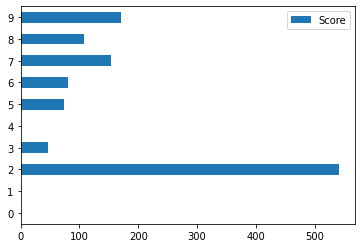

In [28]:
#SelectKBest for feature selection
bf = SelectKBest(score_func=chi2, k='all')
fit = bf.fit(X_train,y_train)
dfscores = pd.DataFrame(fit.scores_)
dfcolumns = pd.DataFrame(columns)

featureScores = pd.concat([dfcolumns,dfscores],axis=1)
featureScores.columns = ['Specs','Score'] 
print(featureScores.nlargest(10,'Score'))
featureScores.plot(kind='barh')

Decision Tree Classifier

In [0]:
#decisiontreee
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV

In [30]:
dt = DecisionTreeClassifier(max_depth=20,max_features=10,random_state = 42)
dt.fit(X_train,y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=20, max_features=10, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=42, splitter='best')

In [0]:
pickle.dump(dt, open("dt-r1.pickle.dat", 'wb'))

In [0]:
y_pred_dt= dt.predict(X_test)

In [33]:
dt_score_train = dt.score(X_train,y_train)
print("Train Prediction Score",dt_score_train*100)
dt_score_test = accuracy_score(y_test,y_pred_dt)
print("Test Prediction Score",dt_score_test*100)

Train Prediction Score 96.04759527375603
Test Prediction Score 93.37200135150356


In [34]:
y_pred_dt_test= dt.predict(test_X)
dt_score_test = accuracy_score(test_Y,y_pred_dt_test)
print("Test Prediction Score",dt_score_test*100)
y_pred_dt_test= dt.predict(test_X1)
dt_score_test = accuracy_score(test_Y1,y_pred_dt_test)
print("Test Prediction Score",dt_score_test*100)
y_pred_dt_test= dt.predict(test_X2)
dt_score_test = accuracy_score(test_Y2,y_pred_dt_test)
print("Test Prediction Score",dt_score_test*100)

Test Prediction Score 78.47532069157836
Test Prediction Score 81.54542164314151
Test Prediction Score 79.17944785276073


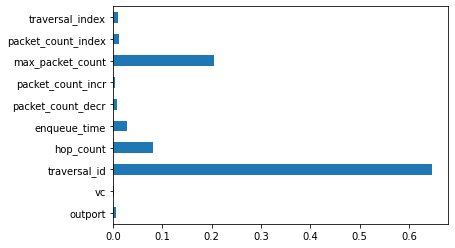

In [35]:
feat_importances = pd.Series(dt.feature_importances_, index=columns)
feat_importances.plot(kind='barh')

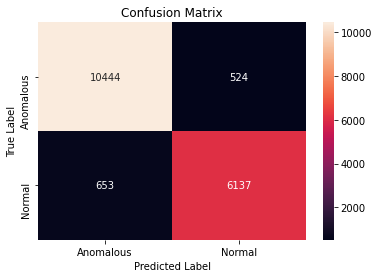

In [36]:
cm = confusion_matrix(y_test, y_pred_dt)
class_label = ["Anomalous", "Normal"]
df_cm = pd.DataFrame(cm, index=class_label,columns=class_label)
sns.heatmap(df_cm, annot=True, fmt='d')
plt.title("Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

In [37]:
print(classification_report(y_test,y_pred_dt))

              precision    recall  f1-score   support

           0       0.94      0.95      0.95     10968
           1       0.92      0.90      0.91      6790

    accuracy                           0.93     17758
   macro avg       0.93      0.93      0.93     17758
weighted avg       0.93      0.93      0.93     17758



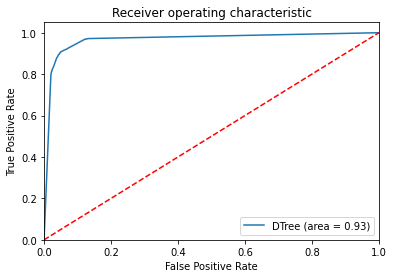

In [38]:
dt_roc_auc = roc_auc_score(y_test, y_pred_dt)
fpr, tpr, thresholds = roc_curve(y_test, dt.predict_proba(X_test)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='DTree (area = %0.2f)' % dt_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('DT_ROC')
plt.show()

XGB Classifier

In [0]:
from xgboost import XGBClassifier
from xgboost import plot_importance

In [40]:
xgbc = XGBClassifier(max_depth=20,min_child_weight=1,n_estimators=500,random_state=42,learning_rate=0.2)
xgbc.fit(X_train,y_train)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0,
              learning_rate=0.2, max_delta_step=0, max_depth=20,
              min_child_weight=1, missing=None, n_estimators=500, n_jobs=1,
              nthread=None, objective='binary:logistic', random_state=42,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=1, verbosity=1)

In [0]:
pickle.dump(xgbc, open("xgbc-r3l-i1.pickle.dat", 'wb'))

In [0]:
y_pred_xgbc= xgbc.predict(X_test)

In [43]:
xgbc_score_train = xgbc.score(X_train,y_train)
print("Train Prediction Score",xgbc_score_train*100)
xgbc_score_test = accuracy_score(y_test,y_pred_xgbc)
print("Test Prediction Score",xgbc_score_test*100)

Train Prediction Score 99.98613191324125
Test Prediction Score 98.56402748057214


In [44]:
y_pred_xgbc_test= xgbc.predict(test_X)
xgbc_score_test = accuracy_score(test_Y,y_pred_xgbc_test)
print("Test Prediction Score",xgbc_score_test*100)
y_pred_xgbc_test= xgbc.predict(test_X1)
xgbc_score_test = accuracy_score(test_Y1,y_pred_xgbc_test)
print("Test Prediction Score",xgbc_score_test*100)
y_pred_xgbc_test= xgbc.predict(test_X2)
xgbc_score_test = accuracy_score(test_Y2,y_pred_xgbc_test)
print("Test Prediction Score",xgbc_score_test*100)

Test Prediction Score 79.72322922476297
Test Prediction Score 82.89178429243576
Test Prediction Score 79.83128834355828


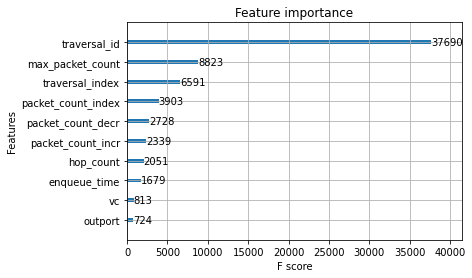

In [45]:
plot_importance(xgbc)
plt.show()

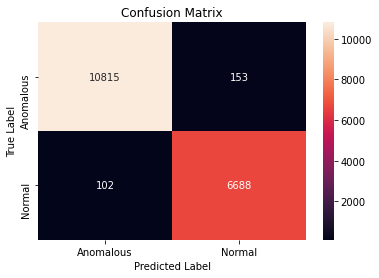

In [46]:
cm = confusion_matrix(y_test, y_pred_xgbc)
class_label = ["Anomalous", "Normal"]
df_cm = pd.DataFrame(cm, index=class_label,columns=class_label)
sns.heatmap(df_cm, annot=True, fmt='d')
plt.title("Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

In [47]:
print(classification_report(y_test,y_pred_xgbc))

              precision    recall  f1-score   support

           0       0.99      0.99      0.99     10968
           1       0.98      0.98      0.98      6790

    accuracy                           0.99     17758
   macro avg       0.98      0.99      0.98     17758
weighted avg       0.99      0.99      0.99     17758



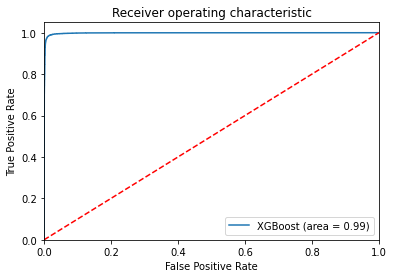

In [48]:
xgb_roc_auc = roc_auc_score(y_test, y_pred_xgbc)
fpr, tpr, thresholds = roc_curve(y_test, xgbc.predict_proba(X_test)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='XGBoost (area = %0.2f)' % xgb_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('XGB_ROC')
plt.show()